 # Linux Distributions

## Overview

Linux distributions, commonly referred to as `"distros,"` are versions of the Linux operating system bundled with various software packages and functionalities to cater to different user needs.

---

### Slide 3: Open Source


Open source is the foundation of Linux distributions, enabling collaboration and innovation by providing free access to software source code. This collaborative approach allows developers worldwide to contribute to and enhance the software, fostering rapid development and widespread adoption.

---

### Slide 4: Popular Linux Distros

- **Ubuntu**: Based on Debian, Ubuntu is user-friendly and widely used for desktops and servers.
- **Debian**: Known for its stability and extensive software repositories, Debian is a foundational distro for many others.
- **Alpine**: A security-oriented, lightweight distro popular for container-based deployments.
- **Fedora**: Sponsored by Red Hat, Fedora focuses on innovation and includes the latest features.
- **CentOS**: A free, community-supported platform functionally compatible with Red Hat Enterprise Linux.

---

## What is Linux?

Linux is a family of open-source Unix-like operating systems based on the Linux kernel, first released by Linus Torvalds on September 17, 1991. As an operating system, Linux manages hardware resources and provides essential services for application software. It's renowned for its stability, security, and flexibility, making it a preferred choice for servers, desktops, and embedded systems.

## Connection to Linux Distributions

A Linux distribution combines the Linux kernel with a selection of software packages, including system libraries, applications, and management tools, to create a complete operating system tailored for specific purposes. Distributions vary in focus, such as user-friendliness, security, or performance optimization, allowing users to choose a distro that best fits their requirements.

## Are All Distros Open Source?

While the Linux kernel itself is open source, not all Linux distributions are entirely open source. Many distros include proprietary software or drivers to enhance hardware compatibility and user experience. However, there are distributions committed to providing a completely free and open-source environment, adhering strictly to the principles of free software. Examples include Trisquel, Parabola, and PureOS, which exclude proprietary components and focus on software freedom.

---
# Running Linux with Docker


## Step 1: Pull the Ubuntu Docker Image

Run the following command to download the official Ubuntu image from Docker Hub:


`docker pull ubuntu`


This pulls the latest version of the Ubuntu image from the official Docker repository.

**or**

`docker run ubuntu`
`
If you use above command it will find ubuntu image in your local computer, if it is not founfd in locally then it will pull the the image to your local computer.
Following shows how its looks like if you run it.


```plaintext
Unable to find image 'ubuntu:latest' locally
latest: Pulling from library/ubuntu
de44b265507a: Download complete
Digest: sha256:80dd3c3b9c6cecb9f1667e9290b3bc61b78c2678c02cbdae5f0fea92cc6734ab
Status: Downloaded newer image for ubuntu:latest
```


Here's a breakdown of this output:

`Unable to find image 'ubuntu:latest' locally`      
- Docker checks if the specified image (ubuntu:latest) is available locally. If not, it proceeds to download it from Docker Hub.

`latest: Pulling from library/ubuntu`               
- Indicates that Docker is pulling the latest version of the Ubuntu image from the official library.

`de44b265507a: Download complete`                   
- Shows the progress of individual layers being downloaded. Each image consists of multiple layers, and Docker downloads them sequentially.

`Digest: sha256:...`                                
- Provides the SHA256 hash of the image, ensuring its integrity and authenticity.

`Status: Downloaded newer image for ubuntu:latest`  
- Confirms that the latest Ubuntu image has been successfully downloaded and is ready for use.

## Step 2: List Docker Containers

`docker ps`

- Lists only the running containers.
- If no containers are currently running, the command returns an empty list.
- Useful for checking the active containers.
```
CONTAINER ID   IMAGE       COMMAND       CREATED        STATUS       PORTS       NAMES
123abc456def   ubuntu      "/bin/bash"   5 minutes ago Up 5 minutes             amazing_alpaca
```

**To view all containers (running or stopped), use:**

`docker ps -a`

This lists all containers along with their statuses. For example:
```
CONTAINER ID   IMAGE    COMMAND                  STATUS                     NAMES
de3bd5f0e855   ubuntu   "/bin/bash"             Exited (0) 24 hours ago   angry_fermi
1d873957ae79   ubuntu   "/bin/bash"             Exited (0) 1 minute ago   gifted_haslett
Additional Observations
```
## Step 3: Run the Ubuntu Container

### Start a container interactively using the Ubuntu image:


`docker run -it ubuntu`


**Breakdown of docker `run -it ubuntu`:**

`-i (Interactive Mode):`

- Keeps the STDIN (standard input) open, even if you're not attached to the container.
- Allows the user to send input directly to the container (e.g., commands for the shell inside the container).

`-t (Pseudo-TTY):`

- Allocates a pseudo-TTY (terminal) for the container.
- This is needed to create a terminal-like interface, making it possible to run commands interactively.

**Combined Effect of -it:**

When these flags are used together:
  - You get an interactive terminal session inside the container.
  - This combination is typically used when you want to run commands or perform tasks inside the container's shell.
Example Usage:

`docker run -it ubuntu`

- This launches an Ubuntu container and opens an interactive terminal.
- By default, it runs the container's CMD or entry point (e.g., /bin/bash for many Linux-based images).
- You can interact with the container just like a Linux terminal.

**What Happens Without -it?**

If you run docker run ubuntu without -it, the container might execute its default command and exit (especially if no long-running process is specified). You won't be able to interact with it directly.

### When you run docker run -it ubuntu, and it starts an interactive shell, the prompt that appears:

`root@21ddf621687e:/# `

**Shell is a programme that take  our commands and passes them to the os for execution.**

`root:`
- Indicates the user currently logged into the container.
- By default, when you run a container, you are logged in as the root user (the superuser in Linux with full administrative privileges).
- If the container has been configured with other users or you log in as a non-root user, this name would change.

`21ddf621687e:`
- Represents the container's hostname.
- Docker assigns a unique container ID (or a truncated version of it) as the hostname for each running container.
- In this case, 21ddf621687e is the unique identifier of your Ubuntu container.
- You can view the full container ID using: `docker ps -q`

`/:`
- Shows the current working directory in the container.
- / represents the root directory of the container's file system (the highest level of the file hierarchy in Linux).
- As you navigate through directories within the container (e.g., using cd /home), this part of the prompt will change to reflect the new working directory.

`#:`
- Indicates that you are working with root privileges in the shell.
- In Linux shell prompts:
   
  `#` signifies a superuser (root).
  
  `$` signifies a regular user.
  
## Step 4: Verify Container Environment
Inside the running container, you can use basic Linux commands:

### Check the current user:

`whoami`

Output:

`root`

### Display the shell information:

`echo $0`

Output:

`/bin/bash`

In the given command:
 - The $0 variable typically holds the name of the currently running shell or script. When run in an interactive shell, $0 outputs the shell being used. In this case, the output:
```
/bin/bash
```
can be broken down as follows:

`/bin:`
- Refers to the directory on the Linux filesystem where binaries (executable programs) are stored.
- /bin contains essential system programs and tools needed for the system to operate, such as shells (bash, sh, zsh) and basic commands (ls, echo, etc.).
- It is part of the system's PATH environment variable, so executables in this directory can be run from anywhere.

`bash:`
- Refers to the name of the shell you are using, which in this case is Bash.
- Bash stands for **"Bourne Again SHell"**, a widely used shell in Linux and Unix systems.
- It provides a command-line interface to interact with the operating system.

**Complete Meaning of /bin/bash:**
The output /bin/bash indicates:
- You are currently using the Bash shell, which is located in the /bin directory.
- The shell program /bin/bash is being executed to interpret your commands.
 
### View command history inside the container:
The history command can recall previously executed commands in the session.

`history`


```
root@21ddf621687e:/# history
    1  echo $0
    2  history
root@21ddf621687e:/#
```
#### Usage of `!<number>`
- It saves time by allowing you to quickly re-run previously executed commands without typing them again.

Example usage:-
```
root@21ddf621687e:/# echo $0
/bin/bash`
root@21ddf621687e:/# history
    1  echo $0
    2  history
root@21ddf621687e:/# !2
history
    1  echo $0
    2  history
root@21ddf621687e:/# !1
echo $0
/bin/bash
```


# Understanding Package Managers and `apt` Commands


## Overview of Package Managers

Package managers are tools that simplify the process of installing, upgrading, configuring, and removing software packages from a computer. 
They are an essential part of modern operating systems, providing a systematic way to manage dependencies and software.

### What Are They?

A package manager automates the following tasks:
- Downloading the correct version of software from a trusted repository.
- Resolving and installing dependencies required for the software to function.
- Keeping installed software up-to-date.
- Allowing for easy uninstallation of software.

### Usage of Package Managers

Common tasks performed using package managers:
- **Search for packages:** Find software you want to install.
- **Install packages:** Download and install software.
- **Update software:** Keep packages up-to-date with the latest features and bug fixes.
- **Remove packages:** Uninstall software you no longer need.

### Different Kinds of Package Managers

Here are some widely used package managers categorized by their ecosystems:

- **Operating Systems:**
  - `apt`: For Debian-based systems like Ubuntu.
  - `yum`/`dnf`: For Red Hat-based systems like Fedora.
  - `pacman`: For Arch Linux.

- **Programming Languages:**
  - `npm` and `yarn`: For JavaScript/Node.js.
  - `pip`: For Python.
  - `gem`: For Ruby.
  - `composer`: For PHP.

- **Others:**
  - `brew`: For macOS.
  - `choco`: For Windows.

Each package manager caters to specific environments and software ecosystems.



## Ubuntu Package Manager: `apt`

The `apt` (Advanced Package Tool) is a package management system used by Debian-based Linux distributions such as Ubuntu. It provides an easy-to-use command-line interface to manage software.

### Key Features of `apt`:
- Simplifies package management with minimal user interaction.
- Automatically resolves and installs software dependencies.
- Supports secure downloads from trusted repositories.




## Using `apt` Package Manager

`apt` is a powerful command-line tool for handling software packages on Debian-based systems. Here are some common commands:

1. **Update the Package List**  
   
   `apt update`
   
   This fetches the latest list of available software.

2. **Install a Package**  
   
   `apt install <package-name>`
   
   Example: To install `nano`, use `apt install nano`.

3. **Remove a Package**  
   
   `apt remove <package-name>`
   
   Example: To remove `nano`, use `apt remove nano`.

4. **List Installed Packages**  
   
   `apt list --installed`
   

5. **Get Information About a Package**  
   
   `apt show <package-name>`
   

The `apt-get` command is an older interface for managing packages, but it is still widely used.



## Installing and Using `nano`

### What is `nano`?

`nano` is a lightweight, easy-to-use text editor for Linux systems. It is often pre-installed in many distributions and is known for its simplicity.

### Steps to Install and Use `nano`

1. **Check if `nano` is Installed:**  
   Run the `nano` command to check if it is installed. If it is not, you will see an error: `Command not found`.
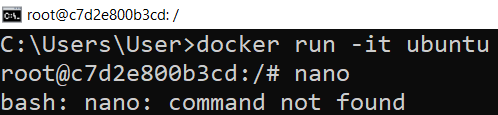




3. **Install `nano`:**
   Use the `apt` package manager to install `nano`:
   
   `apt install nano`

   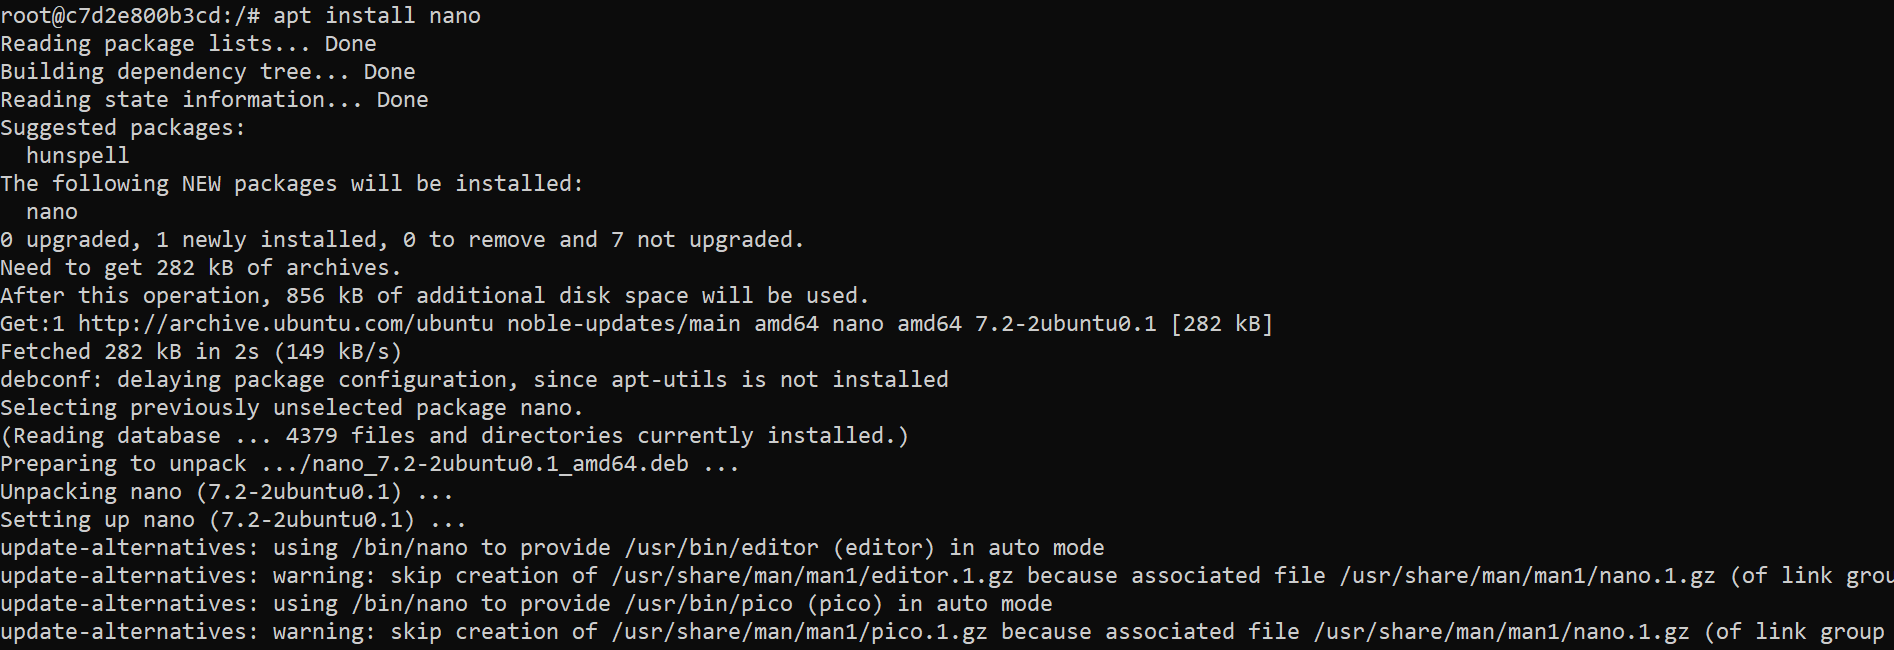

   
   If you see a error like this you have to update apt packege list using `apt update`.

   Then you can run `apt install nano` without errors.

   
   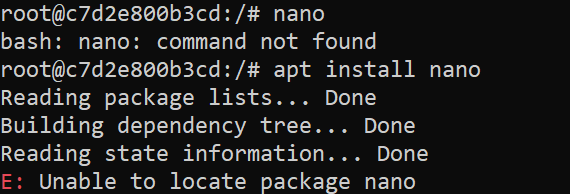

5. **Open a File with `nano`:**  
   Create or edit a file using the `nano` command:

     
   
   `nano <file-name>` or just `nano`
 

4. **Basic Commands in `nano`:**
   - **Save File:** Press `Ctrl + O`.
   - **Exit Editor:** Press `Ctrl + X`.
   - **Cut Line:** Press `Ctrl + K`.
   - **Paste Line:** Press `Ctrl + U`.

    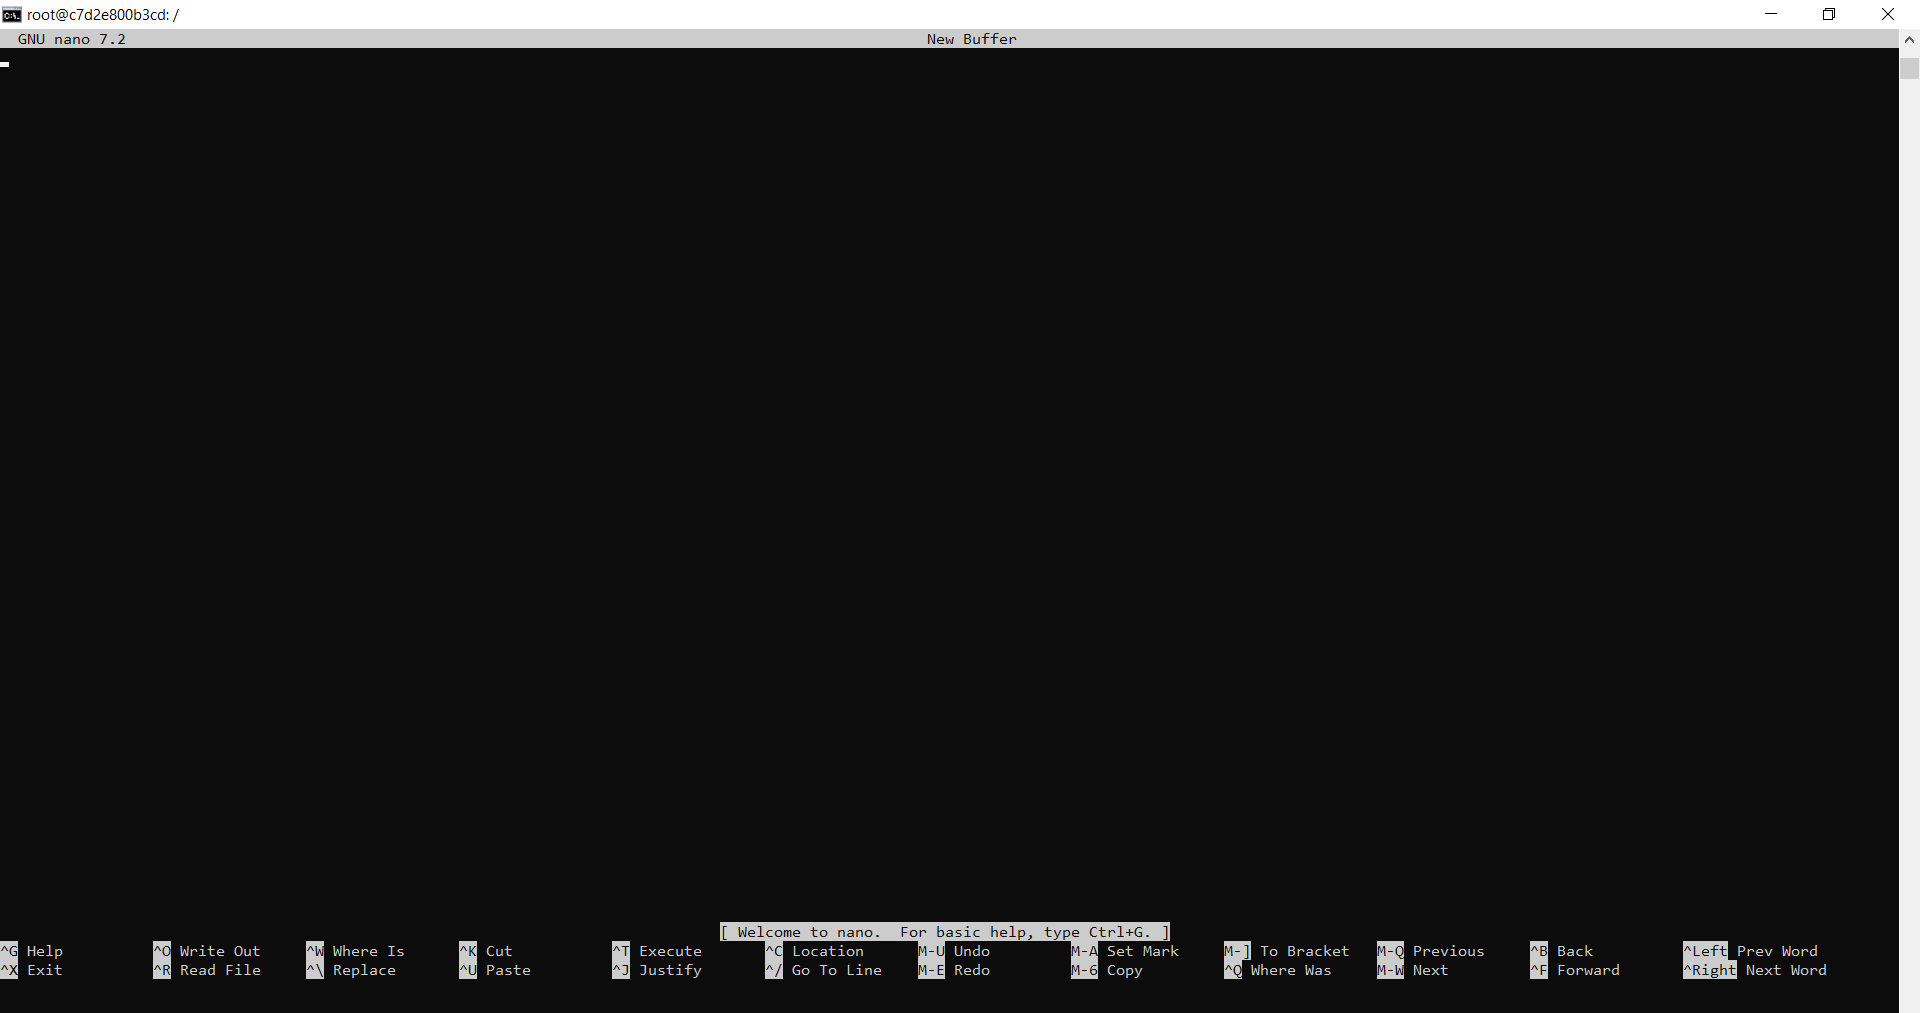

5. **Remove `nano`:**  
   If you no longer need `nano`, remove it using:
  
   `apt remove nano`

    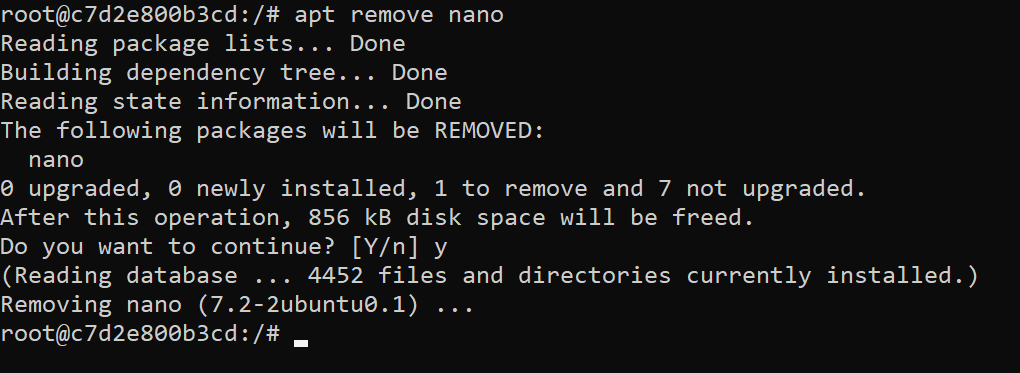

    `nano` is ideal for quick edits and is beginner-friendly compared to other text editors like `vim` or `emacs`.


# Linux File System

The Linux file system is a hierarchical structure that starts from the root directory (`/`) and expands into various directories that serve different purposes. Below is an overview of the key directories in the Linux file system:

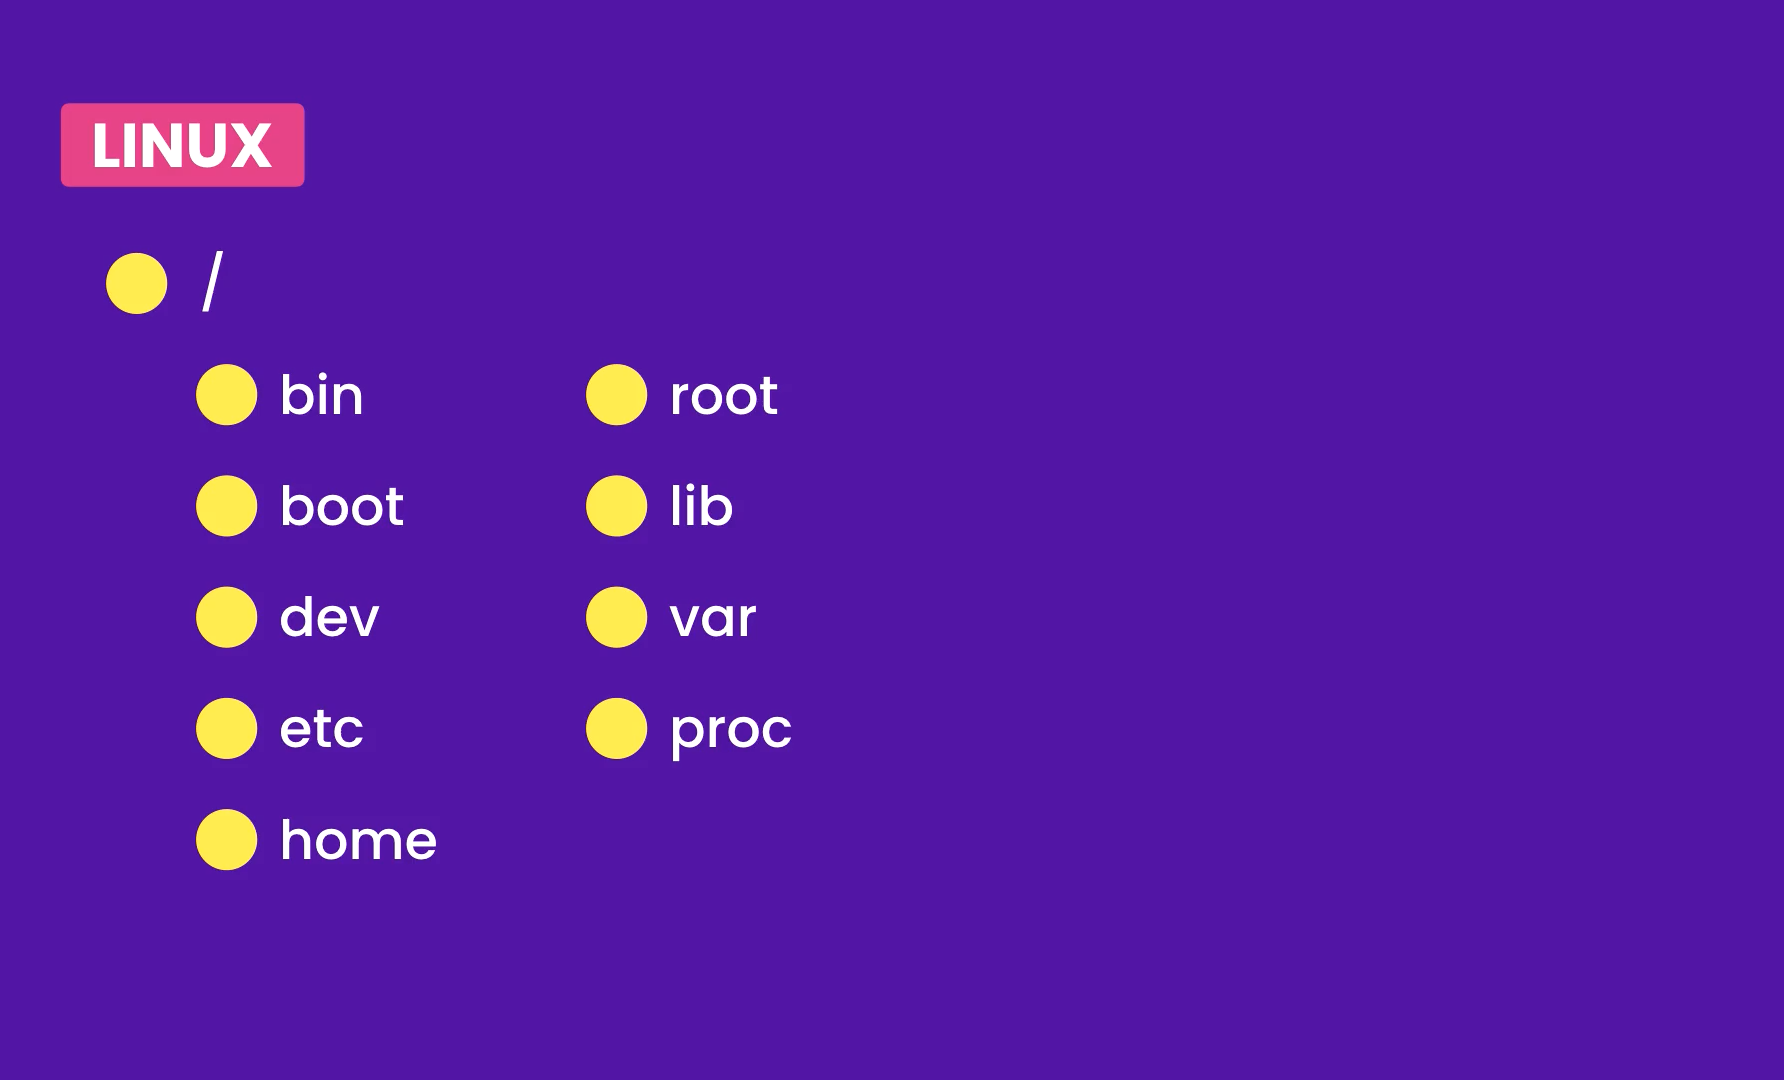

## Root Directory (`/`)
The root directory is the starting point of the Linux file system. All other directories and files branch out from here.

### Key Directories under `/`:

- **`/bin`**: Essential user command binaries, such as `ls`, `cp`, and `mv`.
- **`/boot`**: Contains bootloader files, including the Linux kernel.
- **`/dev`**: Contains device files representing hardware devices.
- **`/etc`**: System-wide configuration files.
- **`/home`**: Home directories for users.
- **`/lib`**: Shared libraries and kernel modules.
- **`/root`**: Home directory for the root user.
- **`/var`**: Variable files like logs, caches, and spool files.
- **`/proc`**: Virtual filesystem providing information about processes.
- **`/tmp`**: Temporary files created by applications.
- **`/usr`**: User utilities and applications.

## "Everything is a File"
In Linux, the philosophy of "everything is a file" means that all system resources, including hardware devices and processes, are represented as files. This abstraction provides a consistent interface for interacting with different components.

### Examples:
- **Devices**: Files in `/dev` represent hardware devices like disks and printers.
- **Processes**: Files in `/proc` represent running processes.
- **Inter-Process Communication**: Mechanisms like pipes and sockets are treated as files.

This approach simplifies the system and allows developers to use standard file operations across various system resources.
"""

# Windows File System Details

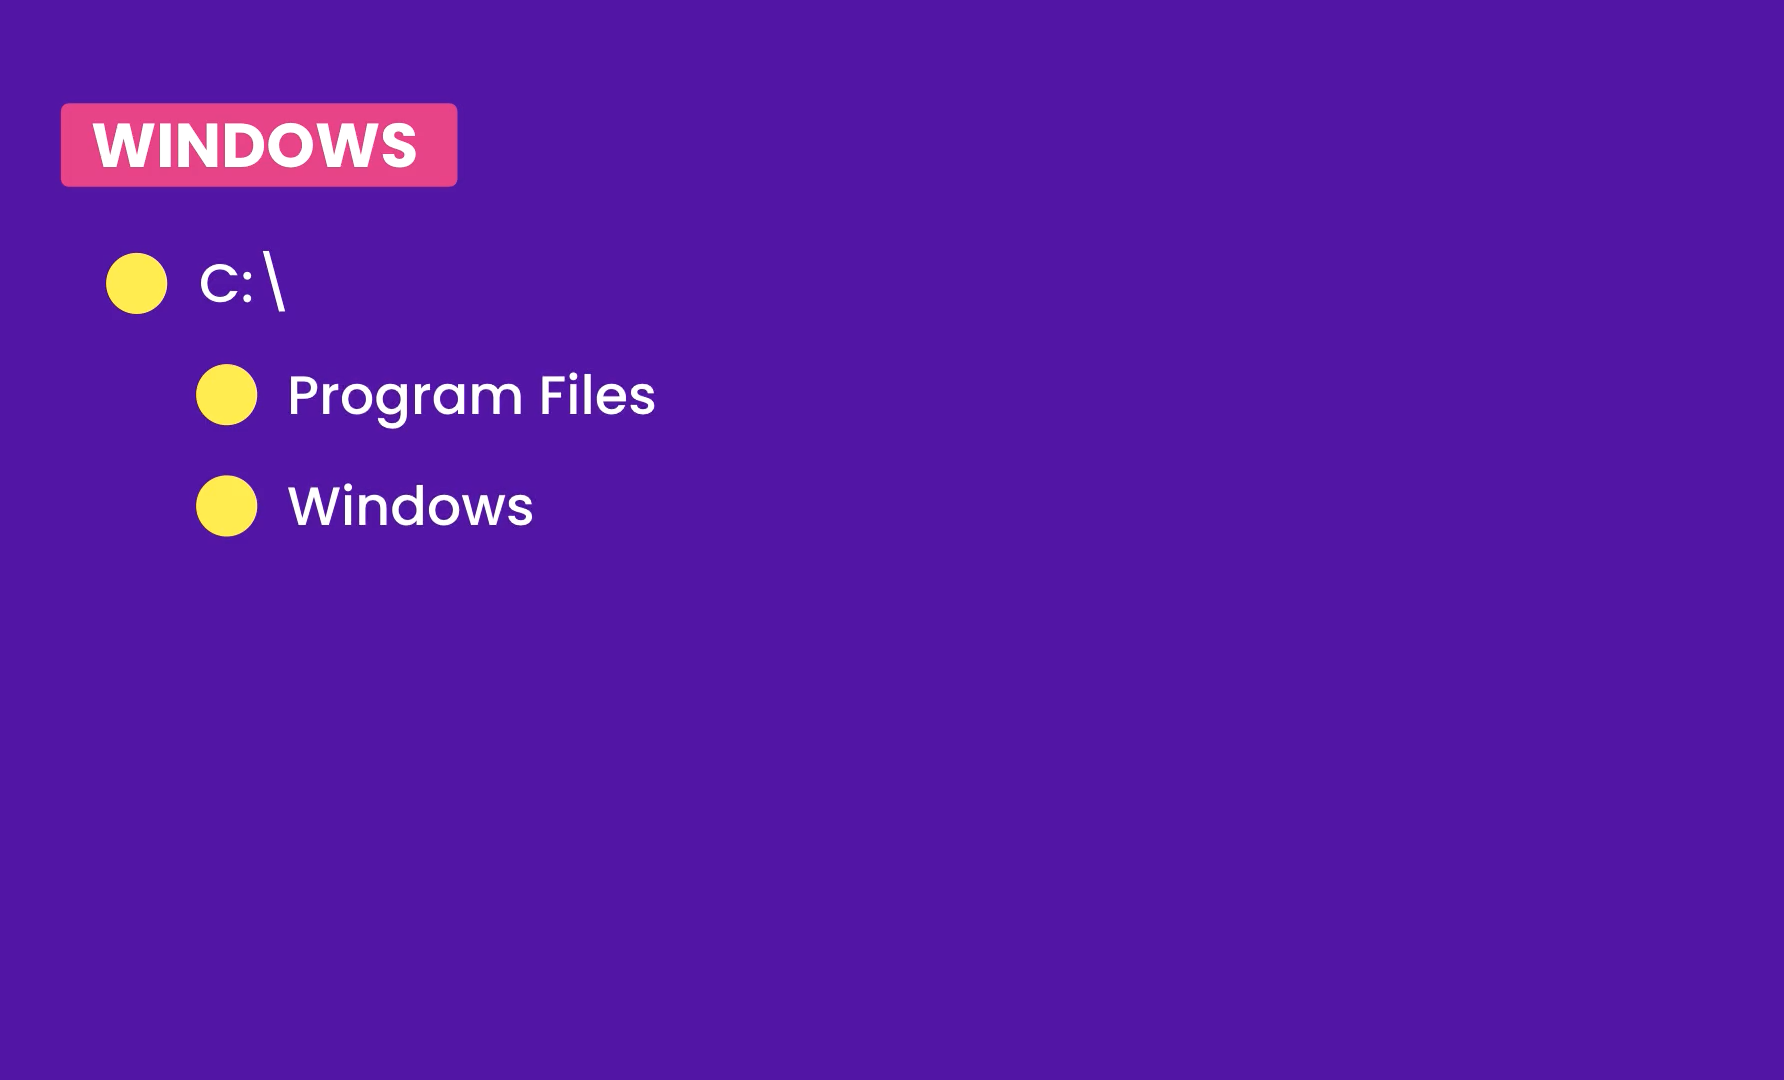

# Windows File System

The Windows file system organizes files and directories under drive letters, such as `C:\`. Each drive serves as a separate root directory.

## Key Features of the Windows File System:
- **Drive Letters**: Separate storage devices are identified by drive letters like `C:`, `D:`, etc.
- **File Paths**: Use backslashes (`\`) to separate directories.
- **File Systems**: Common file systems include NTFS (New Technology File System) and FAT32 (File Allocation Table).

## Key Directories under `C:\`:

- **`C:\Program Files`**: Default location for installed applications.
- **`C:\Windows`**: System files and operating system components.
- **`C:\Users`**: Home directories for users.
- **`C:\Temp`**: Temporary files.
- **`C:\System32`**: Critical system files and executables.

### Comparison with Linux:
- Linux uses a unified directory structure starting from `/`, whereas Windows organizes files under separate drive letters.
- Linux treats everything as a file, while Windows differentiates between files and other resources like devices.

### Benefits of the "Everything is a File" Approach
- Simplicity: Developers can use standard file operations to interact with a wide range of system resources, reducing complexity.

- Flexibility: New devices and features can be integrated into the system without requiring new interfaces; they can be represented as files instead.

- Consistency: Users and applications interact with various system components in a uniform manner, enhancing usability and reducing the learning curve.



# Linux Directory Commands and Observations

## Directory Navigation and Listings

1. **Command**: `pwd` - **(Print working directory)**
   - Displays the current working directory.
   - In this case, it shows `/`, which is the root directory.

2. **Command**: `ls`
   - Lists the files and directories in the current working directory.
   - Example output: `bin`, `dev`, `etc`, `lib32`, etc.

3. **Command**: `ls -l`
   - Provides a detailed listing of files and directories.
   - Example details:
     - `drwxr-xr-x`: Indicates directory permissions.
     - `root root`: Owner and group.
     - `bin -> usr/bin`: Symbolic link indicating `bin` is linked to `usr/bin`.

4. **Command**: `ls /bin` or `ls bin`
   - Lists files in the `/bin` directory, which contains essential binary executables.
   - Example executables: `whoami`, `xargs`, `yes`.

5. **Command**: `cd ..`
   - Moves up one directory level.
   - `cd../..`-Moves 2 levels up.



## Where You Are
1. **`root@c7d2e800b3cd:~#`**
   - Directory: `/root`
   - This is the home directory specific to the root user. It is used for storing personal files and configurations for the root user.
   - To navigate you can use `root@c7d2e800b3cd:/# cd /root` or either `root@c7d2e800b3cd:/# cd ~`
  

2. **`root@c7d2e800b3cd:/#`**
   - Directory: `/`
   - This is the root of the entire filesystem, containing directories like `/home`, `/usr`, `/var`, etc.

            Root Filesystem (/)
            ├── bin
            ├── boot
            ├── dev
            ├── etc
            ├── home
            │   └── user (e.g., `~` for non-root users)
            ├── root (`~` for the root user)
            ├── usr
            ├── var
            └── ... (other directories)


## Key Differences

| Path      | Represents                              | Typical Contents                              |
|-----------|----------------------------------------|-----------------------------------------------|
| `~`       | Home directory of the current user     | User-specific files and configurations        |
| `/`       | Root of the entire filesystem          | All system directories (e.g., `bin`, `usr`)   |

---


# Navigating the file system in Linux

## Observations

### 1. `mkdir test`
- **Command:** Creates a directory named `test`.
- **Output:** The directory `test` is created and visible when running `ls`.

### 2. `mv test docker`
- **Command:** Renames the `test` directory to `docker`.
- **Output:** The directory `test` is no longer listed, and a new directory named `docker` is visible.

### 3. `touch hello.txt`
- **Command:** Creates an empty file named `hello.txt` inside the `docker` directory.
- **Output:** The file `hello.txt` is visible when running `ls` inside `docker`.

### 4. `touch file1.txt file2.txt file3.txt`
- **Command:** Creates three empty files: `file1.txt`, `file2.txt`, and `file3.txt` inside the `docker` directory.
- **Output:** All files are visible when running `ls` inside `docker`.

### 5. `rm file1.txt`
- **Command:** Deletes the `file1.txt` in the `docker` directory. 
- **Output:** Only `file1.txt` will not be able to see when running `ls`.   

### 5. `rm file1.txt file2.txt file3.txt`
- **Command:** Deletes the `file1.txt`,`file2.txt`,`file3.txt` in the `docker` directory. 
- **Output:** Only `file1.txt` will not be able to see when running `ls`.    

### 6. `rm file*`
- **Command:** Deletes all files in the `docker` directory that match the pattern `file*` (e.g., `file1.txt`, `file2.txt`, and `file3.txt`).
- **Output:** Only `hello.txt` remains when running `ls`.

### 7. `rm -r docker`
- **Command:** Deletes the `docker` directory and its contents recursively.
- **Output:** The `docker` directory is no longer listed when running `ls`.

### 8. `mv hello.txt /etc`
- **Command:** `mv hello.txt /etc` means you are moving the file `hello.tx`t from its current location to the `/etc` directory. `
---



# Manupulating Files & Directories in Linux

### 1. **`cat` Command**
The `cat` command is used to:
- View the contents of a file.
- Concatenate files.

#### Example:

`cat file1.txt`

#### Advantages:
- Simple and quick for viewing small files.

#### Disadvantages:
- Not suitable for large files as it displays everything at once.

### 2. `more` Command
The more command is used to view large files one screen at a time.

#### Example:

`more file1.txt`

#### Advantages over cat:
- Displays content one screen at a time, making it easier to handle large files.
- 
#### Key Bindings:
-`Space`: Scroll to the next page.
-`Enter`: Scroll line by line.
-`q`: Quit.

### 3. `less` Command
The less command is similar to more, but with additional functionality and flexibility.

##### Installation:
If less is not installed, you can install it using:
`apt install less`

#### Example:

`less file1.txt`

#### Advantages over more and cat:

- Allows both forward and backward navigation in the file.
- Doesn't load the entire file into memory, making it faster for large files.

#### Key Bindings:

`Space`: Scroll to the next page.

`Enter`: Scroll line by line.

`Up/Down Arrows`: Scroll line by line in respective directions.

`b`: Scroll one page backward.

`q`: Quit.



# Echo Command in Ubuntu

The `echo` command is used in Ubuntu (and other Unix-like systems) to display a line of text or output the value of a variable.

## Basic Syntax

`echo [option] [string...]`


### 1. Displaying Text
You can simply output text using `echo`:

`echo "Hello, Ubuntu!"`

Output: `Hello, Ubuntu!`

### 2. Displaying Variables
You can display the value of variables:

`name="Ubuntu"`
`echo "Hello, $name!"`

Output: `Hello, Ubuntu!`

### 3. Prevent Newline with `-n`
By default, `echo` appends a newline character after the message. Use `-n` to prevent this:

`echo -n "Hello"`

Output: `Hello` (no newline)

### 4. Enabling Escape Sequences with `-e`
Use the `-e` option to interpret special escape sequences like newline, tab , etc.

`echo -e "Hello`
`World"`

Output:
```
Hello
World
```

### 5. Redirecting Output to a File
You can use `echo` to write text to a file:

`echo "This is a log entry" > logfile.txt`

This creates (or overwrites) `logfile.txt` with the given text.

### 6. Command Substitution
You can use `echo` in combination with command substitution:

`echo "Current directory: $(pwd)"`

This will output the current working directory.

`root@eb627f8f4c93:/# echo "$(ls)">> text3.txt`

`root@eb627f8f4c93:/# cat text3.txt`
```
(ls)
bin
boot
dev
etc
home
lib
root
text3.txt
var
```



# Redirection Operators

`>`: Redirects output to a file (overwrites the file if it exists).
`>>`: Redirects output to a file (appends to the file if it exists).


### 1.Creating a new file with specific content:

`echo "This is a test file" > test.txt`

### 2.Combining contents of files:

`cat file1.txt file2.txt > combined.txt`

### 3.Listing directory contents into a file for documentation:
 
`root@eb627f8f4c93:/# cd ~`

`root@eb627f8f4c93:~# pwd >> text3.txt`

`root@eb627f8f4c93:~# cat text3.txt`

Output: 
`/root`


## `>>` Operator: Append Output to a File

**The >> operator is used to redirect output to a file, appending the output to the end of the file instead of overwriting it. If the file does not exist, it will be created.**

**Usage Syntax**

`command >> filename`

### 1. Append a Message to a File
If you already have a file and want to add new content to it:

`echo "This is the first line." > example.txt `  # Create a file with initial content

`echo "This is an appended line." >> example.txt`

Now, the contents of example.txt will be:
```
This is the first line.
This is an appended line.
```
### 2. Append the Output of a Command
To append the output of a command to an existing file:

`ls -l >> directory_list.txt`

This appends the list of files in the current directory to the file directory_list.txt.

# Linux Text Search Commands

Linux provides several commands for searching text within files and directories. These commands are highly efficient and customizable. Below are some key commands along with their usage and examples.

---

## **1. `grep` Command**

The `grep` command is used to search for specific patterns or text within files. 

### **Basic Syntax**

`grep [options] 'pattern' file`


### **Common Options**
- `-i`: Ignore case (case-insensitive search).
- `-r`: Recursively search files in directories.
- `-l`: Display the file names containing the matching lines.
- `-n`: Display line numbers of matching lines.

### **Examples**
#### Search for a Word in a File

`grep hello file1.txt`

This searches for the word "hello" in `file1.txt`.

#### Case-Insensitive Search

`grep -i hello file1.txt`

This searches for "hello" in any case (e.g., Hello, HELLO).

#### Search Multiple Files

`grep -i hello file1.txt file2.txt`

Searches for "hello" in both `file1.txt` and `file2.txt`.

#### Search in All Files with a Pattern

`grep -i hello file*`

This searches for "hello" in all files starting with `file`.

#### Recursive Search in a Directory

`grep -r hello .`

Searches for "hello" recursively in the current directory (`.`).

#### Recursive and Case-Insensitive Search

`grep -ir hello .`

This performs a case-insensitive recursive search for "hello" in the current directory.

## **Usage Tips**

### **Redirect Search Results to a File**
You can save the search results to a file using redirection:

`grep -ir hello . > results.txt`

This stores all matches for "hello" in `results.txt`.

### **Combine with Other Commands**
Use `grep` with `ls`, `cat`, or `find` to enhance your workflow. For example:

`ls | grep file`

Filters the output of `ls` to show only filenames containing "file".

---

### **Advanced Usage**
#### Display File Names Only
```bash
grep -l hello file*
```
Lists only the filenames containing "hello".

#### Display Line Numbers
```bash
grep -n hello file1.txt
```
Shows the line numbers where "hello" appears.

#### Search for Whole Words
```bash
grep -w hello file1.txt
```
Matches only the word "hello" and not substrings like "hello123".

---

These commands help you efficiently locate and analyze text within files and directories on Linux systems. Let me know if you'd like further details or examples!


# Finding Files and Directories in Linux

The `find` command in Linux is a powerful utility used to search for files and directories based on various criteria such as name, type, size, or modification time. Here is an explanation of the commands shown in the provided screenshots:

---

## Basic Commands

### 1. **Listing Files in the Current Directory including hidden ones**
```bash
ls -a
```
- Displays all files and directories, including hidden ones (those starting with a dot `.`).
- Example output:
  ```
  .bashrc
  .profile
  combined.txt
  file1.txt
  file2.txt
  files.txt
  hello.txt
  ```

---

## Using the `find` Command

### 2. **Find Directories in the Current Directory**
```bash
find -type d
```
- Searches for directories (`-type d`) in the current directory and subdirectories.
- Example output:
  ```
  ./
  ./.local
  ./.local/share
  ```

### 3. **Find Files in the Current Directory**
```bash
find -type f
```
- Searches for files (`-type f`) in the current directory and subdirectories.
- Example output:
  ```
  ./file1.txt
  ./file2.txt
  ./files.txt
  ```

---

## Advanced Commands

### 4. **Find a File by Name**
```bash
find -type f -name "file.txt"
```
- Searches for a file with names matching `file1.txt`.
- Example output:
  ```
  ./file.txt
  ``

  
### 5. **Find Files by Name**
```bash
find -type f -name "file*.txt"
```
- Searches for files with names matching the pattern `file*.txt`. The `*` is a wildcard that matches any sequence of characters.
- Example output:
  ```
  ./file1.txt
  ./file2.txt
  ./files.txt
  ```

### 6. **Case-Insensitive Search for Files by Name**
```bash
find -type f -iname "file*.txt"
```
- Searches for files with names matching the pattern `file*.txt`, ignoring case sensitivity (`-iname`).
- Example output:
  ```
  ./file1.txt
  ./file2.txt
  ./files.txt
  ```

### 7. **Find Python Files in Root Directory and Save to a File**
```bash
find / -type f -name "*.py" > python-files.txt
```
- Searches the entire file system (`/`) for Python files (`*.py`) and writes the results to `python-files.txt`.
- To view the contents of the file:
  ```bash
  cat python-files.txt
  ```
- Example output:
  ```
  /usr/share/gcc-10/python/libstdcxx/v6/printers.py
  /usr/share/gcc-10/python/libstdcxx/v6/xmethods.py
  /usr/share/gcc-10/python/libstdcxx/__init__.py
  ...
  ```

---

## Notes
- **`-type d`**: Search for directories.
- **`-type f`**: Search for files.
- **`-name`**: Match file or directory names exactly.
- **`-iname`**: Match names case-insensitively.
- **`>`**: Redirect output to a file.
- **`cat`**: Display the contents of a file.

By mastering these commands, you can efficiently locate and manage files and directories in Linux systems.



# Linux Command Chaining

Linux command chaining allows users to execute multiple commands in a single line. Below are examples of different types of command chaining methods and their uses:

---

## 1. **Semicolon (`;`)**

- **Usage**: Executes all commands sequentially, regardless of whether the previous command succeeded or failed.

```bash
mkdir test ; cd test ; echo "done"
```
- **Explanation**:
  - `mkdir test`: Creates a directory named `test`.
  - `cd test`: Changes to the `test` directory.
  - `echo "done"`: Prints "done" to the console.

---

## 2. **Logical AND (`&&`)**

- **Usage**: Executes the next command only if the previous command succeeds.

```bash
mkdir test && cd test && echo "done"
```
- **Explanation**:
  - If `mkdir test` is successful, then `cd test` is executed.
  - If `cd test` is successful, then `echo "done"` is executed.

---

## 3. **Logical OR (`||`)**

- **Usage**: Executes the next command only if the previous command fails.

```bash
mkdir test || echo "directory exists"
```
- **Explanation**:
  - If `mkdir test` fails (e.g., the directory already exists), then `echo "directory exists"` is executed.

---

## 4. **Combination of AND and OR**

- **Usage**: Combines both `&&` and `||` to handle success and failure scenarios.

```bash
mkdir test && echo "Directory created" || echo "Directory creation failed"
```
- **Explanation**:
  - If `mkdir test` is successful, "Directory created" is printed.
  - If it fails, "Directory creation failed" is printed.

---

## 5. **Backslash (`\`)**

- **Usage**: Used to split long commands across multiple lines for better readability.

```bash
mkdir hello ; \
cd hello ; \
echo "done"
```
- **Explanation**:
  - `mkdir hello`: Creates a directory named `hello`.
  - `cd hello`: Changes to the `hello` directory.
  - `echo "done"`: Prints "done" to the console.

---

## 6. **Using `ls` with Pipes**

- **Usage**: List contents of directories and filter results using `head` or `less`.

```bash
ls /bin | less
ls /bin | head
```
- **Explanation**:
  - `ls /bin | less`: Displays the contents of `/bin` page by page.
  - `ls /bin | head`: Displays the first 10 entries of `/bin`.

---

These chaining techniques can be combined to create powerful, compact, and efficient command sequences for complex tasks.



```bash
mkdir Docker && cd Docker || echo done
```

Explanation:
- mkdir Docker:This command creates a new directory named Docker in the current working directory (~/Docker1).
- && cd Docker:If the mkdir Docker command succeeds (i.e., the directory is successfully created), the && operator ensures that the next command (cd Docker) is executed.The cd Docker command changes the current directory to the newly created Docker directory.
- || echo done:If the mkdir Docker command fails (e.g., the Docker directory already exists), the && operator skips the cd Docker command, and the || operator executes the echo done command instead.
echo done simply prints the word "done" to the terminal.

Result:

`root@0eae6b3abb4c:~/Docker1/Docker#`

- The current working directory will be 

`~/Docker1/Docker.`

- If the Docker directory already exists, it will print:

`done`

The working directory will remain unchanged.

# Linux Environment Variables Guide

Environment variables are a critical aspect of Linux, enabling customization and controlling system behavior. Below is a guide explaining common commands and techniques to work with environment variables based on your examples.

---

## Listing Environment Variables
- **Command:** `printenv`
- **Description:** Lists all current environment variables and their values.
- **Example:**
  ```bash
  printenv
  ```

---

## Viewing a Specific Environment Variable
- **Command:** `echo $VARIABLE_NAME`
- **Description:** Displays the value of a specific environment variable.
- **Example:**
  
#### Checking PATH Variable
- **Command:** `echo $PATH`
- **Description:** Shows the directories included in the system’s PATH variable.
- **Example:**
  ```bash
  echo $PATH
  ```
---

## Setting Environment Variables Temporarily
- **Command:** `export VARIABLE_NAME=value`
- **Description:** Sets an environment variable for the current session.
- **Example:**
  ```bash
  export DB_USER=sithum
  echo $DB_USER
  ```
  
  Output:
  ```bash
  sithum
  ```
**But this is only for this terminal session only. If you open a new termoinal then these variables are not in there.**
---

## Making Environment Variables Persistent
### Method 1: Adding to `.bashrc` in home directory.
1. Navigate to the home directory:
   ```bash
   cd ~
   ```
2. Open or edit the `.bashrc` file:
   ```bash
   nano .bashrc
   ```
3. Add the variable at the end of the file:
   ```bash
   export VARIABLE_NAME=value
   ```
4. Apply the changes by sourcing the file:
   ```bash
   source .bashrc
   ```
5. Verify:
   ```bash
   echo $VARIABLE_NAME
   ```

### Method 2: Directly appending the variable with value to the `.bashrc` file in home directory.

```bash
echo DB_USER=sithum >> .bashrc
source .bashrc
echo $DB_USER
```
Output:
```bash
sithum
```

---



---


# Linux Process Management

In Linux, a **process** is an instance of a running program. Each process is assigned a unique **Process ID (PID)** and is managed by the operating system. Understanding how to manage processes is essential for system administration.

---

## Listing Processes
- **Command:** `ps`
- **Description:** Displays information about the currently running processes.
- **Example:**
  ```bash
  ps
  ```
  **Output:**
  ```bash
  PID   TTY          TIME CMD
   1    pts/0    00:00:00 bash
  34    pts/0    00:00:00 ps
  ```

---

## Running a Process in the Background
- **Command:** `command &`
- **Description:** Executes a process in the background, allowing you to continue using the terminal.
- **Example:**
  ```bash
  sleep 100 &
  ```
  **Output:**
  ```bash
  [1] 38
  ```
  Here, `38` is the PID of the background process.

---

## Listing Background Processes
- **Command:** `jobs`
- **Description:** Displays all running background jobs.
- **Example:**
  ```bash
  jobs
  ```

---

## Bringing a Background Process to the Foreground
- **Command:** `fg %job_number`
- **Description:** Resumes a background process in the foreground.
- **Example:**
  ```bash
  fg %1
  ```

---

## Killing a Process
### Using `kill`
- **Command:** `kill PID`
- **Description:** Terminates a process using its PID.
- **Example:**
  ```bash
  kill 38
  ```
  **Output:**
  ```bash
  [2]+  Terminated  sleep 100
  ```

### Using `killall`
- **Command:** `killall process_name`
- **Description:** Terminates all processes with a specific name.
- **Example:**
  ```bash
  killall sleep
  ```

---

## Viewing Process Tree
- **Command:** `pstree`
- **Description:** Displays a hierarchical tree of all running processes.
- **Example:**
  ```bash
  pstree
  ```

---

## Checking Process Status in Real-Time
- **Command:** `top` or `htop`
- **Description:** Monitors running processes and system resource usage in real time.
- **Example:**
  ```bash
  top
  ```
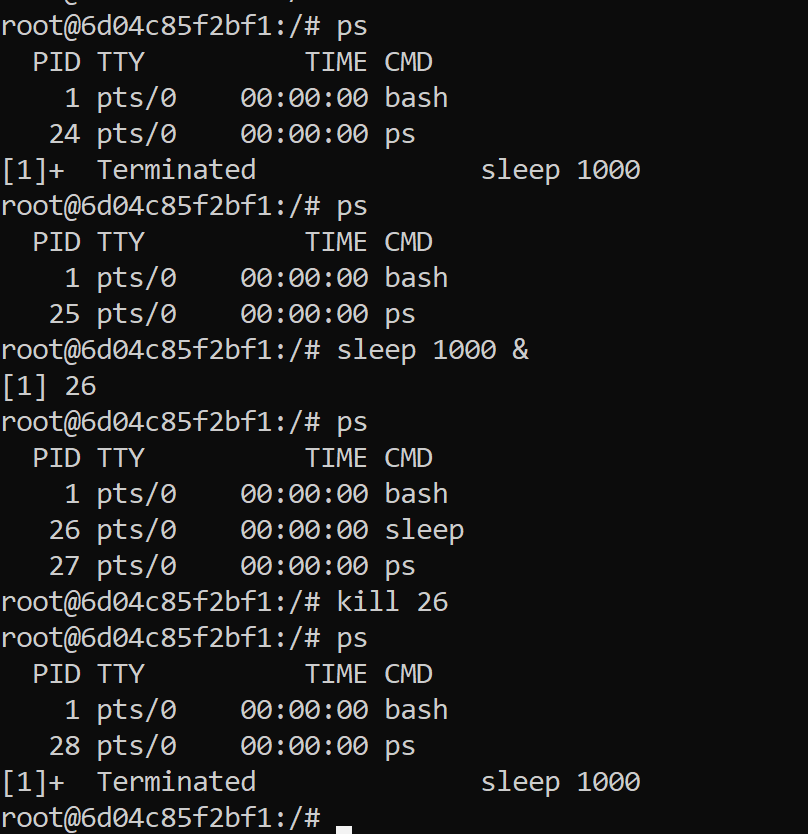
---


# Managing Users in Linux
---

## User Management Commands

### Adding a User: `useradd`
The `useradd` command is used to create a new user.

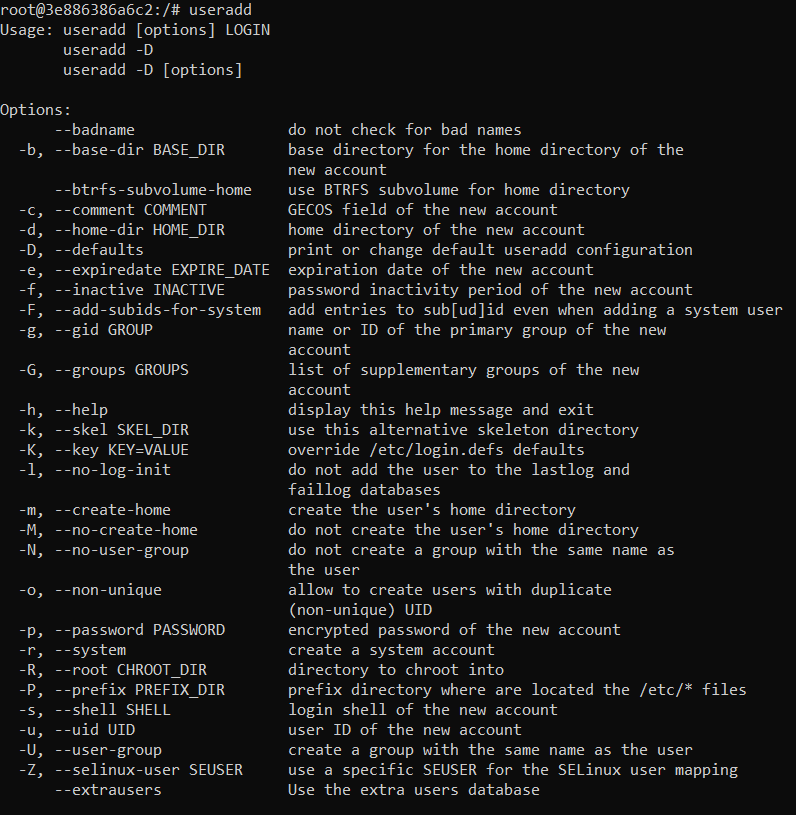

#### Example:
```bash
useradd -m sithum
```
- `-m`: Creates the user’s home directory at `/home/sithum`.

After running this command, an entry is created in the `/etc/passwd` file.

### Modifying a User: `usermod`
The `usermod` command modifies user properties.

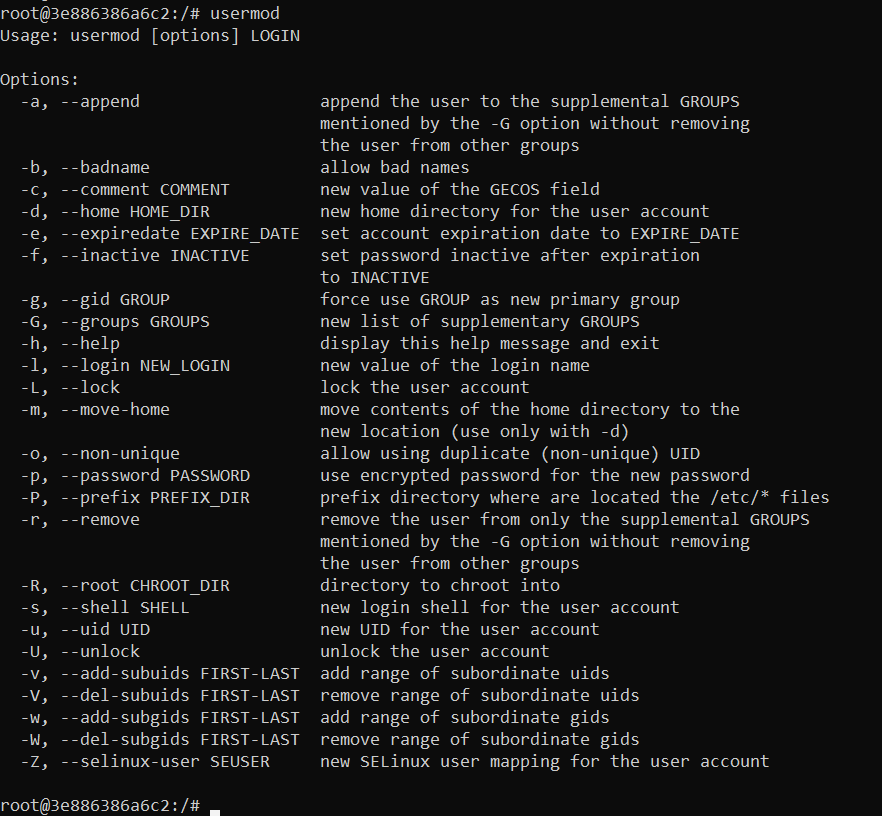

#### Example:
```bash
usermod -s /bin/bash sithum
```
- `-s`: Changes the default shell for the user. Here, the shell is changed to `/bin/bash` for the user `sithum`.

### Deleting a User: `userdel`
The `userdel` command removes a user from the system.

#### Example:
```bash
userdel sithum
```
- This command deletes the user, but their home directory may still remain unless additional flags are used (e.g., `userdel -r sithum`).

---

## Understanding `cat /etc/passwd`
The `/etc/passwd` file stores information about system users. Each line in the file represents a user and has the following structure:

```plaintext
username:x:UID:GID:comment:home_directory:shell
```

#### Example Entry:
```plaintext
sithum:x:1001:1001::/home/sithum:/bin/sh
```
- `sithum`: Username.
- `x`: Placeholder for the password (actual password is stored in `/etc/shadow`).
- `1001`: User ID (UID).
- `1001`: Group ID (GID).
- `` (empty): Comment field, typically used for user description.
- `/home/sithum`: User’s home directory.
- `/bin/sh`: Default shell assigned to the user.


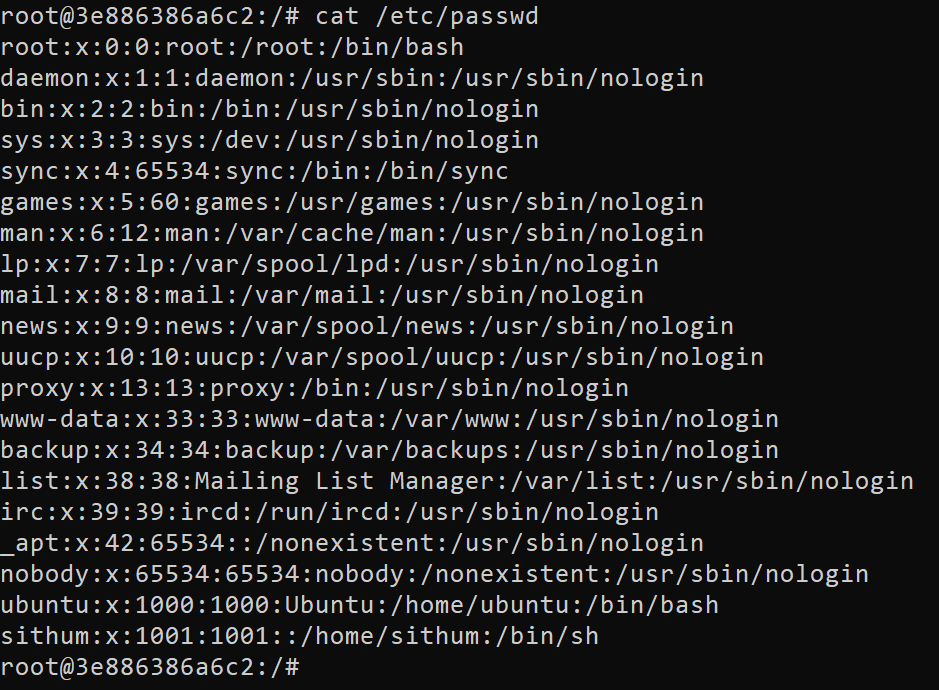

### Difference Between `/bin/sh` and `/bin/bash`
- `/bin/sh`: A symbolic link to a shell, often a minimal implementation (e.g., `dash` in Ubuntu).
- `/bin/bash`: A more feature-rich shell, commonly used for scripting and interactive use.


```bash
usermod -s /bin/bash sithum
```
- `-s`: Changes the default shell for the user. Here, the shell is changed to `/bin/bash` for the user `sithum`
---

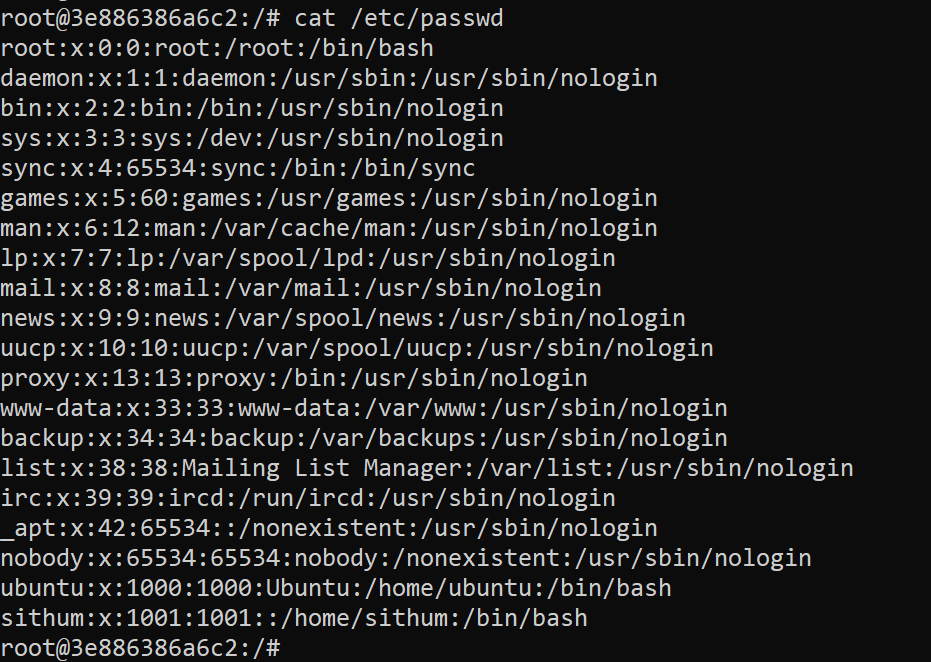

## Understanding `/etc/shadow`
The `/etc/shadow` file contains encrypted user passwords and additional metadata for password management. Access to this file is restricted to the `root` user.

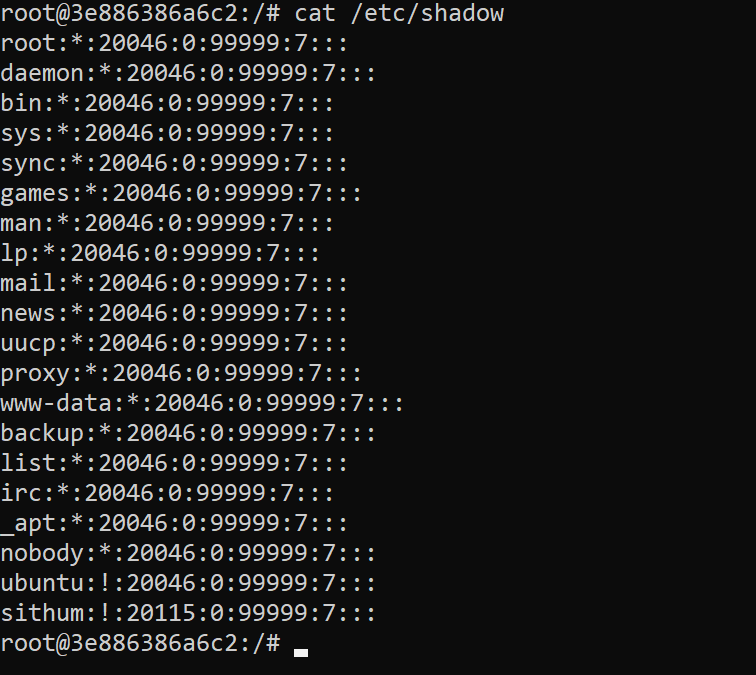

#### Example Entry:
```plaintext
sithum:$6$abc123$encryptedpassword:19485:0:99999:7:::
```
- `sithum`: Username.
- `$6$abc123$encryptedpassword`: Encrypted password (hashed using SHA-512).
- `19485`: Last password change (in days since Jan 1, 1970).
- `0`: Minimum days before a password change.
- `99999`: Maximum days before a password change.
- `7`: Days before password expiry to issue a warning.

---

## Docker User Management

### Viewing Running Containers: `docker ps`
The `docker ps` command lists all running containers.

#### Example Output:
```plaintext
CONTAINER ID   IMAGE     COMMAND   CREATED        STATUS       PORTS   NAMES
2f34567abcd   ubuntu    "/bin/bash"   2 hours ago   Up 2 hours           container1
```

### Accessing a Container:
#### Example:
```bash
docker exec -it 2f34567abcd bash
```
- `-it`: Opens an interactive terminal session.
- `2f34567abcd`: Container ID.
- `bash`: The command to run inside the container.

#### Running as a Specific User:
```bash
docker exec -it -u john 2f34567abcd bash
```
- `-u sithum`: Runs the command as the user `sithum` within the container.

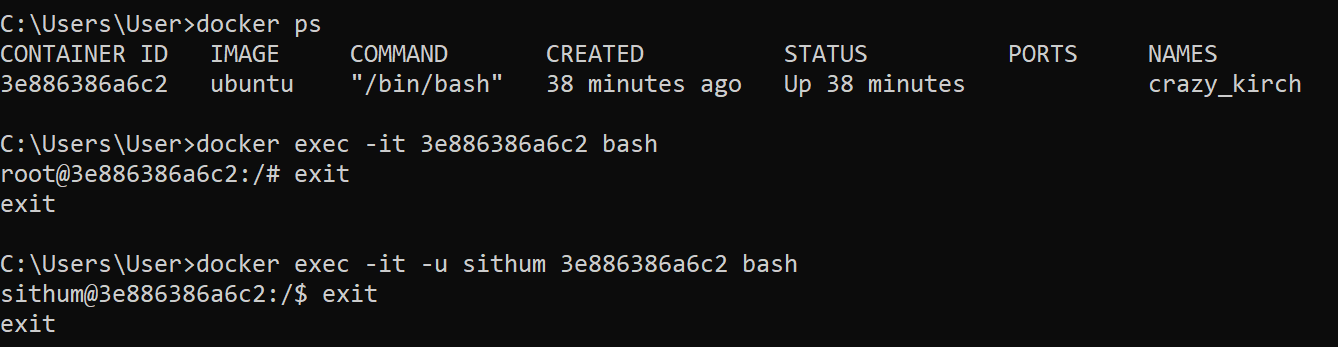
---



# Using the `adduser` Command in Linux

The `adduser` command is a user-friendly wrapper for the `useradd` command in Linux. It simplifies the process of adding a new user, setting up their home directory, and configuring basic information. Below is an example and step-by-step explanation of using `adduser` to create a new user.

---

## Example: Adding a New User `bimsara`

### Command Execution
```bash
root@3e886386a6c2:~# adduser bimsara
```

### Output Details
```plaintext
info: Adding user `bimsara' ...
info: Selecting UID/GID from range 1000 to 59999 ...
info: Adding new group `bimsara' (1002) ...
info: Adding new user `bimsara' (1002) with group `bimsara (1002)' ...
info: Creating home directory `/home/bimsara' ...
info: Copying files from `/etc/skel' ...
```

### Password Setup
When prompted, enter a password for the new user:
```plaintext
New password:
Retype new password:
passwd: password updated successfully
```

### User Information Setup
You will be asked to provide optional user information. Press `Enter` to skip any field or fill in as needed:
```plaintext
Changing the user information for bimsara
Enter the new value, or press ENTER for the default
        Full Name []: Sithum Bimsara
        Room Number []: 33
        Work Phone []: 0702443978
        Home Phone []: 0703170105
        Other []: nothing
Is the information correct? [Y/n] y
```

### Adding to Groups
The user is added to supplemental or extra groups (e.g., `users`):
```plaintext
info: Adding new user `bimsara' to supplemental / extra groups `users' ...
info: Adding user `bimsara' to group `users' ...
```

---

## Steps Explained

1. **Adding the User**:
   - The command `adduser bimsara` creates a new user with the username `bimsara`.
   - A new group with the same name (`bimsara`) is created.

2. **UID/GID Assignment**:
   - A unique user ID (UID) and group ID (GID) are assigned from the configured range (typically 1000-59999).

3. **Home Directory Creation**:
   - The home directory `/home/bimsara` is created.
   - Default configuration files are copied from `/etc/skel`.

4. **Password Setup**:
   - The user is prompted to set a password.
   - The password is hashed and stored in `/etc/shadow`.

5. **User Information**:
   - Optional information like full name, room number, phone numbers, and other details can be provided.

6. **Group Assignments**:
   - The user is added to default and supplemental groups.
   - The group `users` is often included.

---

## Verifying the New User

1. **Check the `/etc/passwd` File**:
   ```bash
   cat /etc/passwd | grep bimsara
   ```
   Example Output:
   ```plaintext
   bimsara:x:1002:1002:Sithum Bimsara:/home/bimsara:/bin/bash
   ```

2. **Check the Home Directory**:
   ```bash
   ls -l /home/bimsara
   ```

3. **Verify Group Membership**:
   ```bash
   groups bimsara
   ```

---

## Common Issues and Fixes

1. **`adduser` Command Not Found**:
   - Install it using your package manager:
     ```bash
     apt update && apt install adduser
     ```

2. **Permissions Errors**:
   - Ensure you are running the command as `root` or with `sudo` privileges:
     ```bash
     sudo adduser bimsara
     ```

---

## Notes
- The `adduser` command is available on most Debian-based systems.
- For non-Debian systems, the equivalent `useradd` command can be used, but it requires more manual steps for setting up the user environment.

By following these steps, you can easily add a new user to your Linux system with proper configurations and permissions.



# Managing Groups in Linux

---

## Group Management Commands

### Adding a Group: `groupadd`
The `groupadd` command is used to create a new group.

#### Example:
```bash
groupadd developers
```
- This command creates a new group called `developers`.

### Viewing Groups: `cat /etc/group`
The `/etc/group` file contains information about all groups on the system. Each line in the file represents a group and has the following structure:

```plaintext
group_name:x:GID:group_members
```

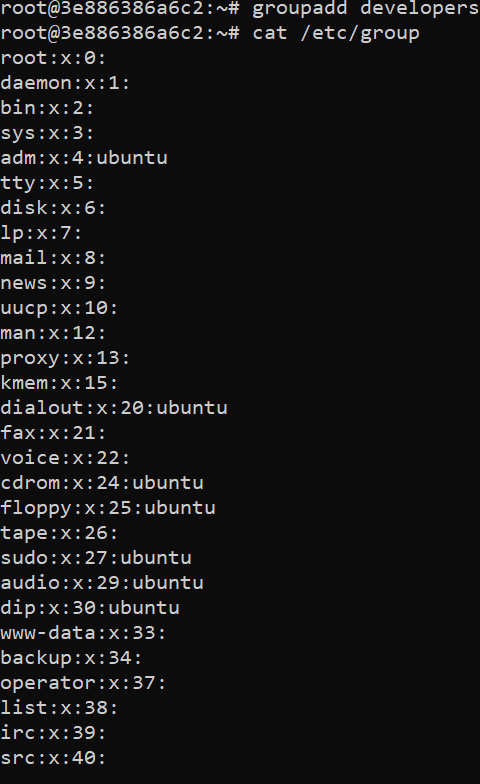

#### Example Entry:
```plaintext
developers:x:1002:sithum,john
```
- `developers`: Group name.
- `x`: Placeholder for the password (used for group password features, rarely used).
- `1002`: Group ID (GID).
- `sithum,john`: Members of the group.

### Modifying a User’s Groups: `usermod`
The `usermod` command can assign a user to one or more groups.

#### Example:
```bash
usermod -G developers sithum
```
- `-G`: Adds the user `sithum` to the group `developers` as a secondary group.
- Note: This command replaces all secondary groups for the user. Use `usermod -aG` to append groups without removing existing ones.

---

## Primary and Secondary Groups

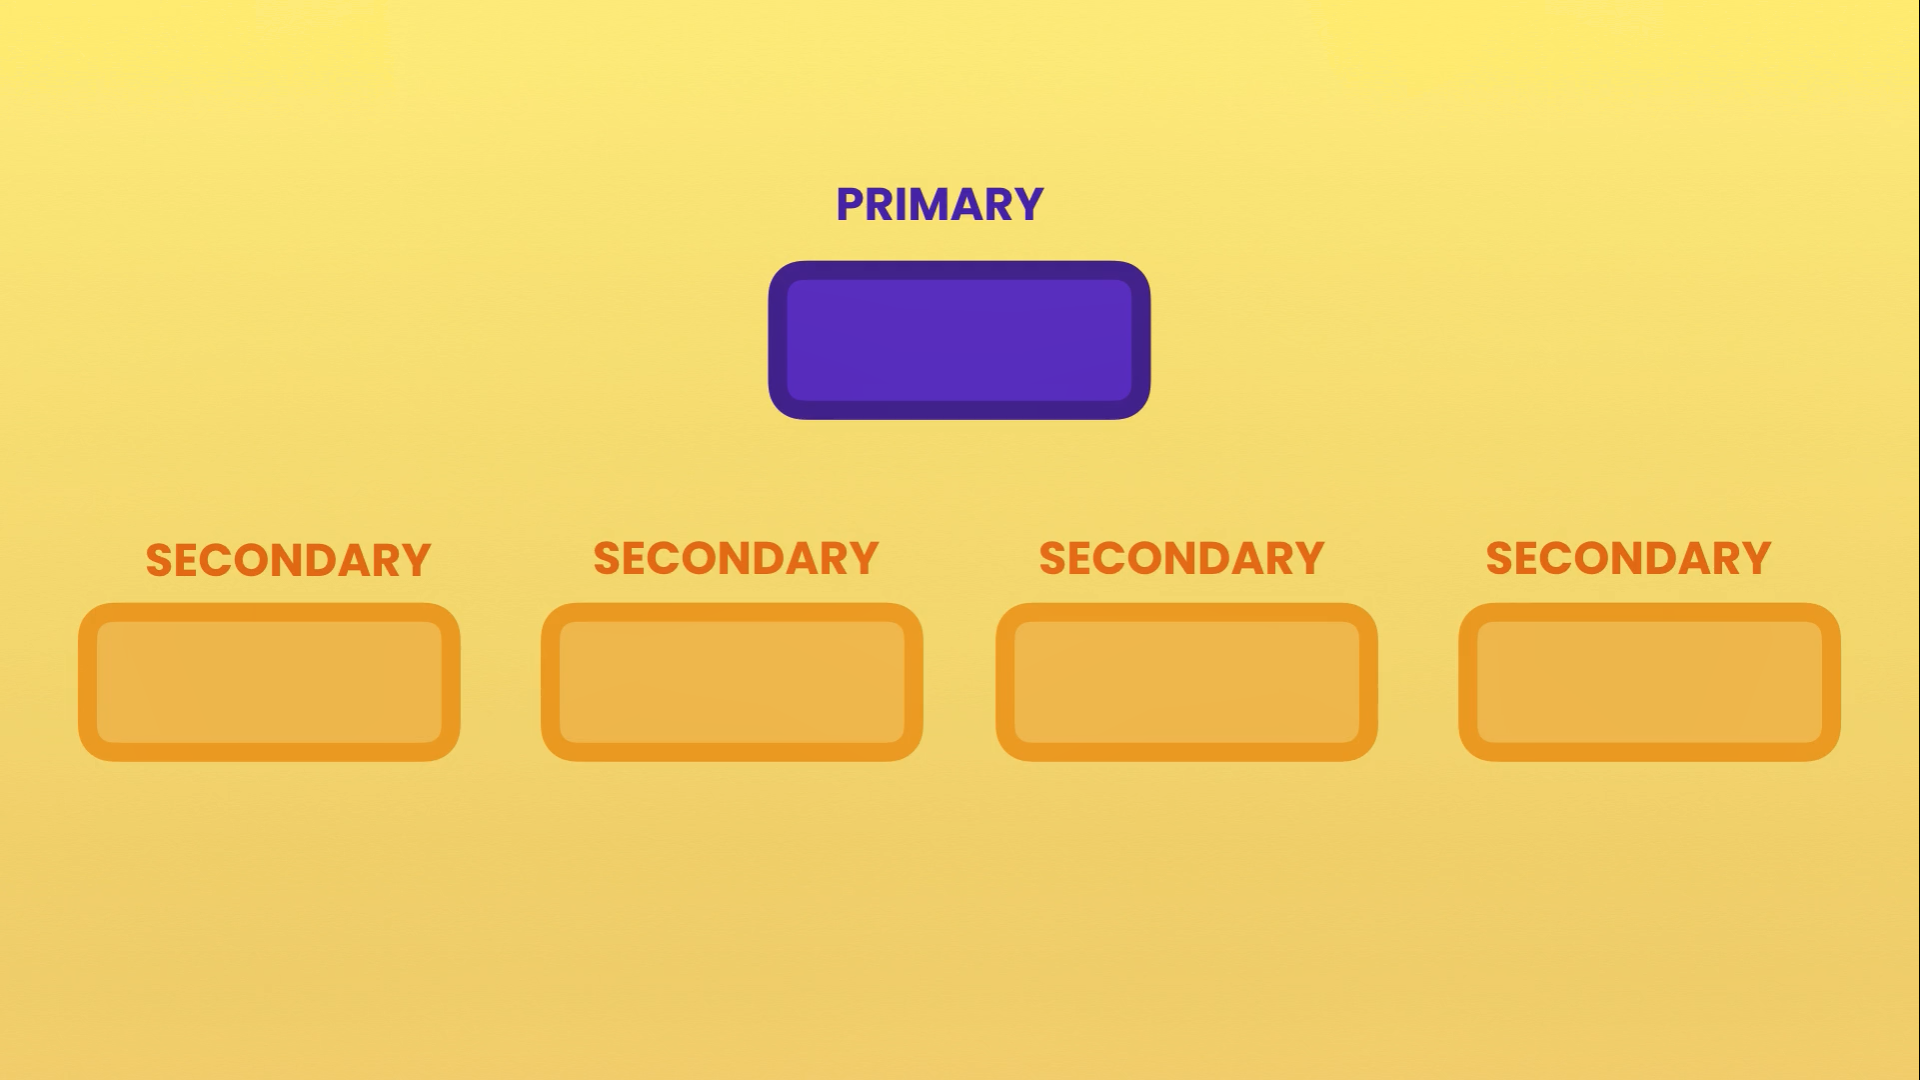

### Primary Group
- The primary group is assigned to the user at the time of creation and is stored in the `/etc/passwd` file.
- It is used as the default group for files and directories created by the user.

### Secondary Groups
- Secondary groups are additional groups that a user can belong to.
- These groups grant the user access to additional resources, such as shared files or directories.

### Example of User Groups:
#### Viewing a User's Groups:
```bash
groups sithum
```
#### Output:
```plaintext
sithum : sithum developers
```
- `sithum`: Primary group.
- `developers`: Secondary group.

### Hierarchical Class Structure
The hierarchical class structure of primary and secondary groups is useful for:
- Controlling access to shared resources.
- Assigning different permission levels to users within the same system.
- Simplifying management by grouping users based on roles or functions.

---

## Viewing User Information in `/etc/passwd`
The `/etc/passwd` file contains user account information.

#### Example Commands:

`cat /etc/passwd | grep john`
`grep john /etc/passwd`

- These commands search for the user `john` in the `/etc/passwd` file.

#### Example Output:
```plaintext
john:x:1000:1000::/home/john:/bin/bash
```
- `john`: Username.
- `x`: Placeholder for the password.
- `1000`: User ID (UID).
- `1000`: Group ID (GID).
- `/home/john`: Home directory.
- `/bin/bash`: Default shell.

Similarly, for `sithum`:
```bash
cat /etc/passwd | grep sithum
grep sithum /etc/passwd
```
#### Example Output:
```plaintext
sithum:x:1001:1001::/home/sithum:/bin/bash
```

---





# File Permissions in Linux

This document provides an overview of file permissions in Linux, including how to work with shell scripts (`.sh` files) and modify permissions. It explains related commands and examples step-by-step.

---

## Understanding `.sh` Files

### What Are `.sh` Files?
- `.sh` files are shell script files containing commands to be executed by a shell interpreter (e.g., Bash).
- They are used for automation, scripting tasks, and deployment processes, such as creating and running `deploy.sh` for deployment.

### Relevance to File Permissions:
- To execute a `.sh` file, the file needs executable permissions.
- Without appropriate permissions, the script cannot be run, even if it contains valid commands.

---

## Example Workflow: Creating and Managing a Script

### 1. Creating a Script File
You can create a script file using the `echo` command and redirect (`>`):
```bash
echo echo hello > deploy.sh
```
- This command creates a file named `deploy.sh` containing the line `echo hello`.

### 2. Viewing the Script
```bash
cat deploy.sh
```
#### Output:
```plaintext
echo hello
```
This displays the contents of the `deploy.sh` file.

### 3. Listing Files and Permissions
```bash
ls -l
```
#### Example Output:
```plaintext
total 16
drwxr-x--- 2 bimsara bimsara 4096 Jan 27 09:59 bimsara
-rw-r--r-- 1 root    root      11 Jan 27 10:46 deploy.sh
drwxr-x--- 2 sithum  sithum  4096 Jan 27 09:27 sithum
drwxr-x--- 2 ubuntu  ubuntu  4096 Nov 19 09:52 ubuntu
```
### Explaining `ls -l` Output:
- `-rw-r--r--`: File permissions for `deploy.sh`:
  - `-`: Indicates a regular file.
  - `rw-`: Owner (read and write permissions).
  - `r--`: Group (read-only permission).
  - `r--`: Others (read-only permission).
- `1 root root`: File owner and group (both `root`).
- `11`: File size in bytes.
- `Jan 27 10:46`: Last modification date and time.
- `deploy.sh`: File name.

---

## Modifying File Permissions

### 1. Making the Script Executable
To allow others to execute the file:
```bash
chmod o+x deploy.sh
```
- `o+x`: Adds execute permission for others.

#### Verifying the Change:
```bash
ls -l deploy.sh
```
#### Example Output:
```plaintext
-rw-r--r-x 1 root root 11 Jan 27 10:46 deploy.sh
```
- The `x` at the end indicates that others can execute the file.

### 2. Running the Script
#### Running with `./`:
```bash
./deploy.sh
```
#### Output:
```plaintext
hello
```
The script executes and prints `hello`.

---

## Common Errors and Fixes

### Error: "No such file or directory"
#### Example:
```bash
cd home
bash: cd: home: No such file or directory
```
#### Fix:
Always use an absolute or correct relative path, e.g.,
```bash
cd /home
```

### Error: ".deploy.sh: command not found"
#### Example:
```bash
.deploy.sh
bash: .deploy.sh: command not found
```
#### Fix:
Ensure the file is executable and run it correctly:
```bash
chmod o+x deploy.sh
./deploy.sh
```

### Error: "chmod: missing operand"
#### Example:
```bash
chmod o
chmod: missing operand after 'o'
```
#### Fix:
Provide a complete permission argument, e.g.,
```bash
chmod o+x deploy.sh
```

---

## Hidden Files and Directories
To view hidden files:
```bash
ls -a
```
---
